In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = pd.read_csv('/home/urwa/Documents/side_projects/urban/data/featureData/lga.csv')

In [4]:
def train(model, optimiser, scheduler, criterion,epochs = 500):
    losses = []
    # Main optimization loop
    for t in range(epochs):

        optimiser.zero_grad()

        y_predicted = model(X_train)

        current_loss = criterion(y_predicted, y_train)

        current_loss.backward()

        optimiser.step()

        print(f"t = {t}, loss = {current_loss}")

        losses.append(current_loss)

        scheduler.step()    
    return losses,model

In [5]:
dataset.shape

(8757, 1045)

In [6]:
dataset.head(3)

,Date,Hour,1,10,100,101,102,106,107,108,...,91_lag_3,92_lag_3,93_lag_3,94_lag_3,95_lag_3,96_lag_3,97_lag_3,98_lag_3,99_lag_3,arrival_lag_3
0,2018-01-01,3,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2018-01-01,4,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2018-01-01,5,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
class Linear_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Linear_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=out_features, bias=True)
        
    def forward(self, x):
        return self.fc1(x)

In [8]:
class Simple_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=1000, bias=True)
        self.fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
        self.fc3 = nn.Linear(in_features=500, out_features=out_features, bias=True)
        
    def forward(self, x):
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [9]:
lag_columns = [c for c in dataset.columns if 'lag' in c]
len(lag_columns)

774

In [10]:
DateColumns = ['Date']

ext_columns = ['Dow', 'arrival','maxtemp', 'mintemp', 'avgtemp', 'departure', 'hdd',
       'cdd', 'participation', 'newsnow', 'snowdepth', 'ifSnow']

targetColumns = [c for c in dataset.columns if c not in ext_columns and \
                c not in DateColumns and c not in lag_columns and c != 'Hour']
len(targetColumns)

257

In [11]:
features_cols = [c for c in dataset.columns if c not in targetColumns and c not in DateColumns]
len(features_cols)

787

In [12]:
x = dataset[features_cols].values
y = dataset[targetColumns].values

In [13]:
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# scaler_x.fit(x)
# scaler_y.fit(y)

# x = scaler_x.transform(x)
# y = scaler_y.transform(y)

In [14]:
x = torch.tensor(x).float().to(device)
print(x.shape)
y = torch.tensor(y).float().to(device)
print(y.shape)

torch.Size([8757, 787])
torch.Size([8757, 257])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

t = 0, loss = 4.915871620178223
t = 1, loss = 5.286558628082275
t = 2, loss = 5.178562164306641
t = 3, loss = 5.694545269012451
t = 4, loss = 5.298595428466797
t = 5, loss = 5.793187141418457
t = 6, loss = 5.277612209320068
t = 7, loss = 5.843708515167236
t = 8, loss = 5.275269031524658
t = 9, loss = 5.867095947265625
t = 10, loss = 5.26806116104126
t = 11, loss = 5.888187408447266
t = 12, loss = 5.263960361480713
t = 13, loss = 5.903356552124023
t = 14, loss = 5.259459018707275
t = 15, loss = 5.91526985168457
t = 16, loss = 5.255254745483398
t = 17, loss = 5.926268577575684
t = 18, loss = 5.255317211151123
t = 19, loss = 5.937730312347412
t = 20, loss = 5.255524158477783
t = 21, loss = 5.943543434143066
t = 22, loss = 5.252948760986328
t = 23, loss = 5.947137832641602
t = 24, loss = 5.250796318054199
t = 25, loss = 5.950705528259277
t = 26, loss = 5.248780727386475
t = 27, loss = 5.955406188964844
t = 28, loss = 5.248271465301514
t = 29, loss = 5.960672855377197
t = 30, loss = 5.25013

t = 339, loss = 1.4106382131576538
t = 340, loss = 1.4106321334838867
t = 341, loss = 1.4106261730194092
t = 342, loss = 1.410620093345642
t = 343, loss = 1.4106141328811646
t = 344, loss = 1.4106080532073975
t = 345, loss = 1.4106019735336304
t = 346, loss = 1.4105957746505737
t = 347, loss = 1.4105898141860962
t = 348, loss = 1.4105839729309082
t = 349, loss = 1.4105777740478516
t = 350, loss = 1.4105716943740845
t = 351, loss = 1.4105658531188965
t = 352, loss = 1.4105596542358398
t = 353, loss = 1.4105535745620728
t = 354, loss = 1.4105476140975952
t = 355, loss = 1.4105415344238281
t = 356, loss = 1.4105355739593506
t = 357, loss = 1.4105294942855835
t = 358, loss = 1.4105234146118164
t = 359, loss = 1.4105174541473389
t = 360, loss = 1.4105113744735718
t = 361, loss = 1.4105051755905151
t = 362, loss = 1.4104992151260376
t = 363, loss = 1.41049325466156
t = 364, loss = 1.4104870557785034
t = 365, loss = 1.4104810953140259
t = 366, loss = 1.410475254058838
t = 367, loss = 1.410469

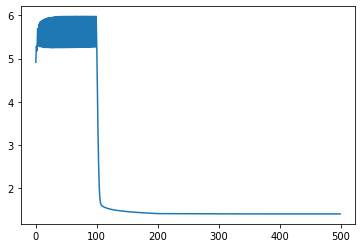

In [16]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Linear_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)


t = 0, loss = 2.7944319248199463
t = 1, loss = 2.498420000076294
t = 2, loss = 2.4060139656066895
t = 3, loss = 2.3215103149414062
t = 4, loss = 2.2283782958984375
t = 5, loss = 2.1459484100341797
t = 6, loss = 2.072981595993042
t = 7, loss = 2.0684597492218018
t = 8, loss = 1.9331071376800537
t = 9, loss = 1.8692506551742554
t = 10, loss = 1.753777265548706
t = 11, loss = 1.7514225244522095
t = 12, loss = 1.676851749420166
t = 13, loss = 1.6740343570709229
t = 14, loss = 1.6412805318832397
t = 15, loss = 1.628854513168335
t = 16, loss = 1.5801807641983032
t = 17, loss = 1.5616896152496338
t = 18, loss = 1.4869636297225952
t = 19, loss = 1.505552053451538
t = 20, loss = 1.4576793909072876
t = 21, loss = 1.462951421737671
t = 22, loss = 1.40561842918396
t = 23, loss = 1.4260287284851074
t = 24, loss = 1.383133888244629
t = 25, loss = 1.4035863876342773
t = 26, loss = 1.3585346937179565
t = 27, loss = 1.4814395904541016
t = 28, loss = 1.4916157722473145
t = 29, loss = 1.9870115518569946


t = 257, loss = 1.0226681232452393
t = 258, loss = 1.0226513147354126
t = 259, loss = 1.022634506225586
t = 260, loss = 1.0226176977157593
t = 261, loss = 1.0226010084152222
t = 262, loss = 1.022584319114685
t = 263, loss = 1.0225675106048584
t = 264, loss = 1.0225507020950317
t = 265, loss = 1.0225341320037842
t = 266, loss = 1.0225173234939575
t = 267, loss = 1.0225006341934204
t = 268, loss = 1.0224840641021729
t = 269, loss = 1.0224673748016357
t = 270, loss = 1.0224508047103882
t = 271, loss = 1.022434115409851
t = 272, loss = 1.0224175453186035
t = 273, loss = 1.0224008560180664
t = 274, loss = 1.0223842859268188
t = 275, loss = 1.0223677158355713
t = 276, loss = 1.0223510265350342
t = 277, loss = 1.0223344564437866
t = 278, loss = 1.0223180055618286
t = 279, loss = 1.022301435470581
t = 280, loss = 1.0222848653793335
t = 281, loss = 1.022268295288086
t = 282, loss = 1.022251844406128
t = 283, loss = 1.0222352743148804
t = 284, loss = 1.0222188234329224
t = 285, loss = 1.02220225

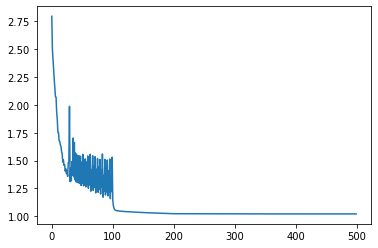

In [17]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Simple_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)
